In [75]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import re
from collections import Counter
pd.options.display.max_seq_items = 2000

In [2]:
## using the dataset that has been preprocessed and only contains PSG and ECG data 
f = open('./psg_ecg_all_features.pkl', 'rb')
data = pickle.load(f)
f.close()
print(data.columns)


Index(['y', 'patient', 'PSG_Flow_std', 'PSG_Flow_rms', 'PSG_Flow_med',
       'PSG_Thorax_std', 'PSG_Thorax_rms', 'PSG_Thorax_med', 'PSG_Abdomen_std',
       'PSG_Abdomen_rms', 'PSG_Abdomen_med', 'signal_ecg_i_std',
       'signal_ecg_i_rms', 'signal_ecg_i_med', 'signal_ecg_ii_std',
       'signal_ecg_ii_rms', 'signal_ecg_ii_med'],
      dtype='object')


In [69]:
print(data.shape[0])

72475


In [104]:
## the main driver function that runs the MLP algorithm
def MLP(X,y):
       
       print("Starting algorithm")
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


       ## standardizing the data 
              
       X_train = StandardScaler().fit_transform(X_train)    


       ## undersampling technique used initially but discarded later as it did not show better results than oversampling
       # undersample = NearMiss(version=1, n_neighbors=3)
       # X_train, y_train = undersample.fit_resample(X_train, y_train)
       

       ## oversampling technique 
       oversample = SMOTE()
       X_train, y_train = oversample.fit_resample(X_train, y_train)


       counts = Counter(y_train)
       X_test = StandardScaler().fit_transform(X_test)

       
       clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    learning_rate_init=0.01)
       
       clf.fit(X_train,y_train)

       y_pred = clf.predict(X_test)

       return X_train, X_test, y_train, y_test, y_pred

In [103]:

X = data[['PSG_Flow_std', 'PSG_Flow_rms', 'PSG_Flow_med',
       'PSG_Thorax_std', 'PSG_Thorax_rms', 'PSG_Thorax_med', 'PSG_Abdomen_std',
       'PSG_Abdomen_rms', 'PSG_Abdomen_med', 'signal_ecg_i_std',
       'signal_ecg_i_rms', 'signal_ecg_i_med', 'signal_ecg_ii_std',
       'signal_ecg_ii_rms', 'signal_ecg_ii_med']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)

report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)

Starting algorithm
training data length before 57980
number of 1s before: 16925
training data length before 33850
counts of 1 after 16925


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.827     0.811     0.819     10314
       APNEA      0.554     0.581     0.567      4181

    accuracy                          0.744     14495
   macro avg      0.691     0.696     0.693     14495
weighted avg      0.748     0.744     0.746     14495

Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.813     0.828     0.820     10314
       APNEA      0.555     0.530     0.543      4181

    accuracy                          0.742     14495
   macro avg      0.684     0.679     0.682     14495
weighted avg      0.739     0.742     0.740     14495

Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.759     0.654     0.703     10314
       APNEA      0.364     0.488     0.417      4181

    accuracy                          0.606     14495
   macro avg      0.562     0.571     0.560     14495
weighted avg      0.645     0.606     0.620     14495

Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.809     0.813     0.811     10314
       APNEA      0.534     0.527     0.530      4181

    accuracy                          0.731     14495
   macro avg      0.671     0.670     0.671     14495
weighted avg      0.730     0.731     0.730     14495

Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.798     0.842     0.819     10314
       APNEA      0.548     0.474     0.508      4181

    accuracy                          0.735     14495
   macro avg      0.673     0.658     0.664     14495
weighted avg      0.726     0.735     0.729     14495

Starting algorithm


c:\Users\vafab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        None      0.806     0.796     0.801     10314
       APNEA      0.512     0.527     0.519      4181

    accuracy                          0.719     14495
   macro avg      0.659     0.662     0.660     14495
weighted avg      0.721     0.719     0.720     14495



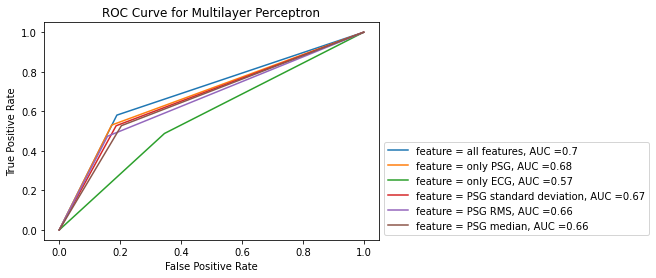

In [106]:


## PSG + ECG features used for training
X = data[['PSG_Flow_std', 'PSG_Flow_rms', 'PSG_Flow_med',
       'PSG_Thorax_std', 'PSG_Thorax_rms', 'PSG_Thorax_med', 'PSG_Abdomen_std',
       'PSG_Abdomen_rms', 'PSG_Abdomen_med', 'signal_ecg_i_std',
       'signal_ecg_i_rms', 'signal_ecg_i_med', 'signal_ecg_ii_std',
       'signal_ecg_ii_rms', 'signal_ecg_ii_med']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)

report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = all features, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")


## Only PSG data used 
X = data[['PSG_Flow_std', 'PSG_Flow_rms', 'PSG_Flow_med',
       'PSG_Thorax_std', 'PSG_Thorax_rms', 'PSG_Thorax_med', 'PSG_Abdomen_std',
       'PSG_Abdomen_rms', 'PSG_Abdomen_med']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)

report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = only PSG, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")


## Only ECG data used 
X = data[['signal_ecg_i_std','signal_ecg_i_rms', 'signal_ecg_i_med', 'signal_ecg_ii_std',
       'signal_ecg_ii_rms', 'signal_ecg_ii_med']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)

report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = only ECG, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")


## Using PCG std data 
X = data[['PSG_Flow_std', 'PSG_Thorax_std', 'PSG_Abdomen_std']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = PSG standard deviation, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")

##Using PCG rms data 
X = data[['PSG_Flow_rms', 'PSG_Thorax_rms', 'PSG_Abdomen_rms']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = PSG RMS, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")

## Using PCG median values
X = data[[ 'PSG_Flow_med', 'PSG_Thorax_med',  'PSG_Abdomen_med']]

y = data[['y']]

X_train, X_test, y_train, y_test, y_pred = MLP(X,y)
report = classification_report(y_test, y_pred, target_names=['None', 'APNEA'], digits=3)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = round(roc_auc_score(y_test, y_pred),2)
plt.plot(fpr, tpr, '-', label = "feature = PSG median, AUC ="+ str(score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multilayer Perceptron")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")